<a href="https://colab.research.google.com/github/mfaysoares/Qtd_Cupcakes/blob/main/Modelo_Cupcakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


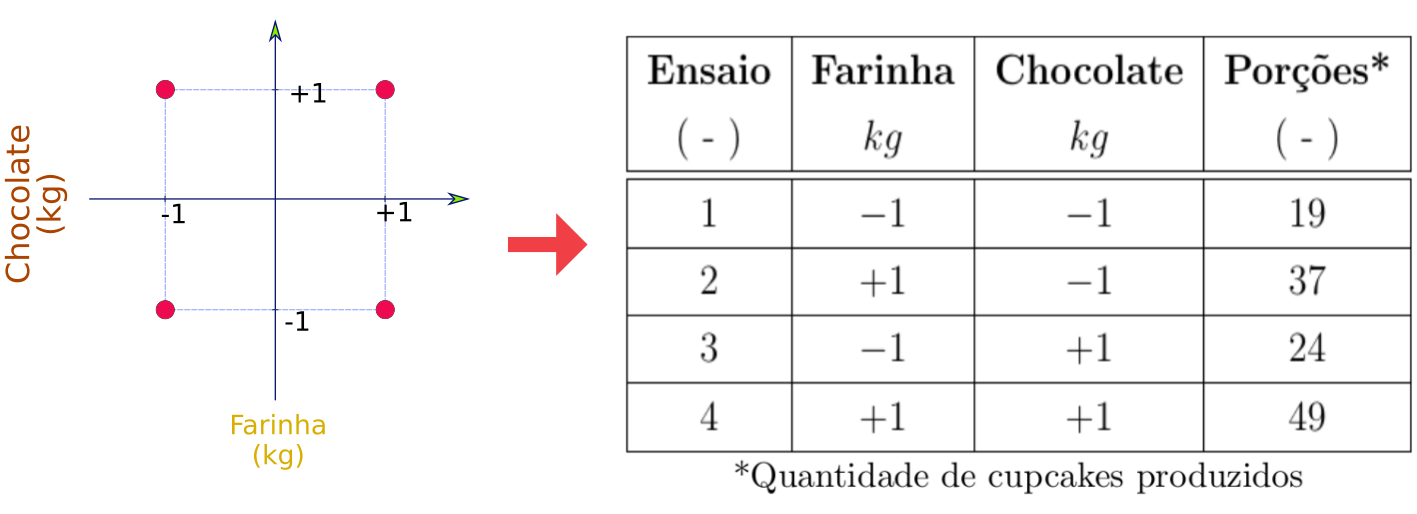

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
ensaios = np.array([[-1,-1], [1,-1], [-1,1], [1,1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [5]:
pip install pyDOE2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=2d82dc8555637f295dcdd9cc35ffe6cf0d62f8e676940b492adb9a51500f6ac6
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built pyDOE2


In [6]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [7]:
ensaios = doe.ff2n(2)

In [8]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [9]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

In [10]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [13]:
experimento['Porcoes'] = [19, 37, 24, 49]

In [14]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [15]:
import seaborn as sns

In [16]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
# estilo -> white, dark, whitegrid, darkgrid, ticks

sns.set_palette('icefire')
sns.set_style('darkgrid')


### Para a farinha

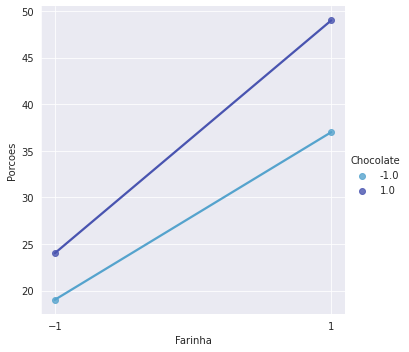

In [17]:
ax1 = sns.lmplot(x="Farinha", y="Porcoes", data=experimento, ci = None,
                 hue = "Chocolate")
ax1.set(xticks = (-1, 1))

### Para o chocolate

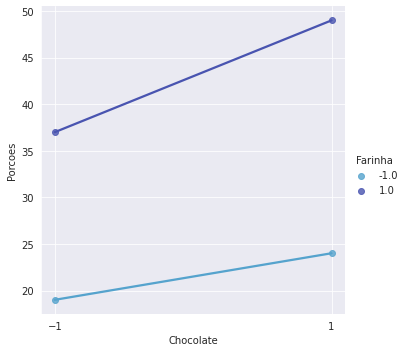

In [18]:
ax2 = sns.lmplot(x="Chocolate", y="Porcoes", data=experimento, ci = None,
                 hue = "Farinha")
ax2.set(xticks = (-1, 1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

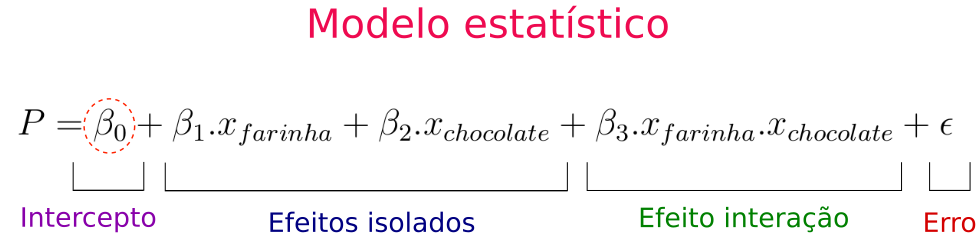


### Bibliotecas  Stats Model


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [21]:
modelo_ajustado = modelo.fit()

In [22]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                nan
Time:                        22:20:04   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: invalid value encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


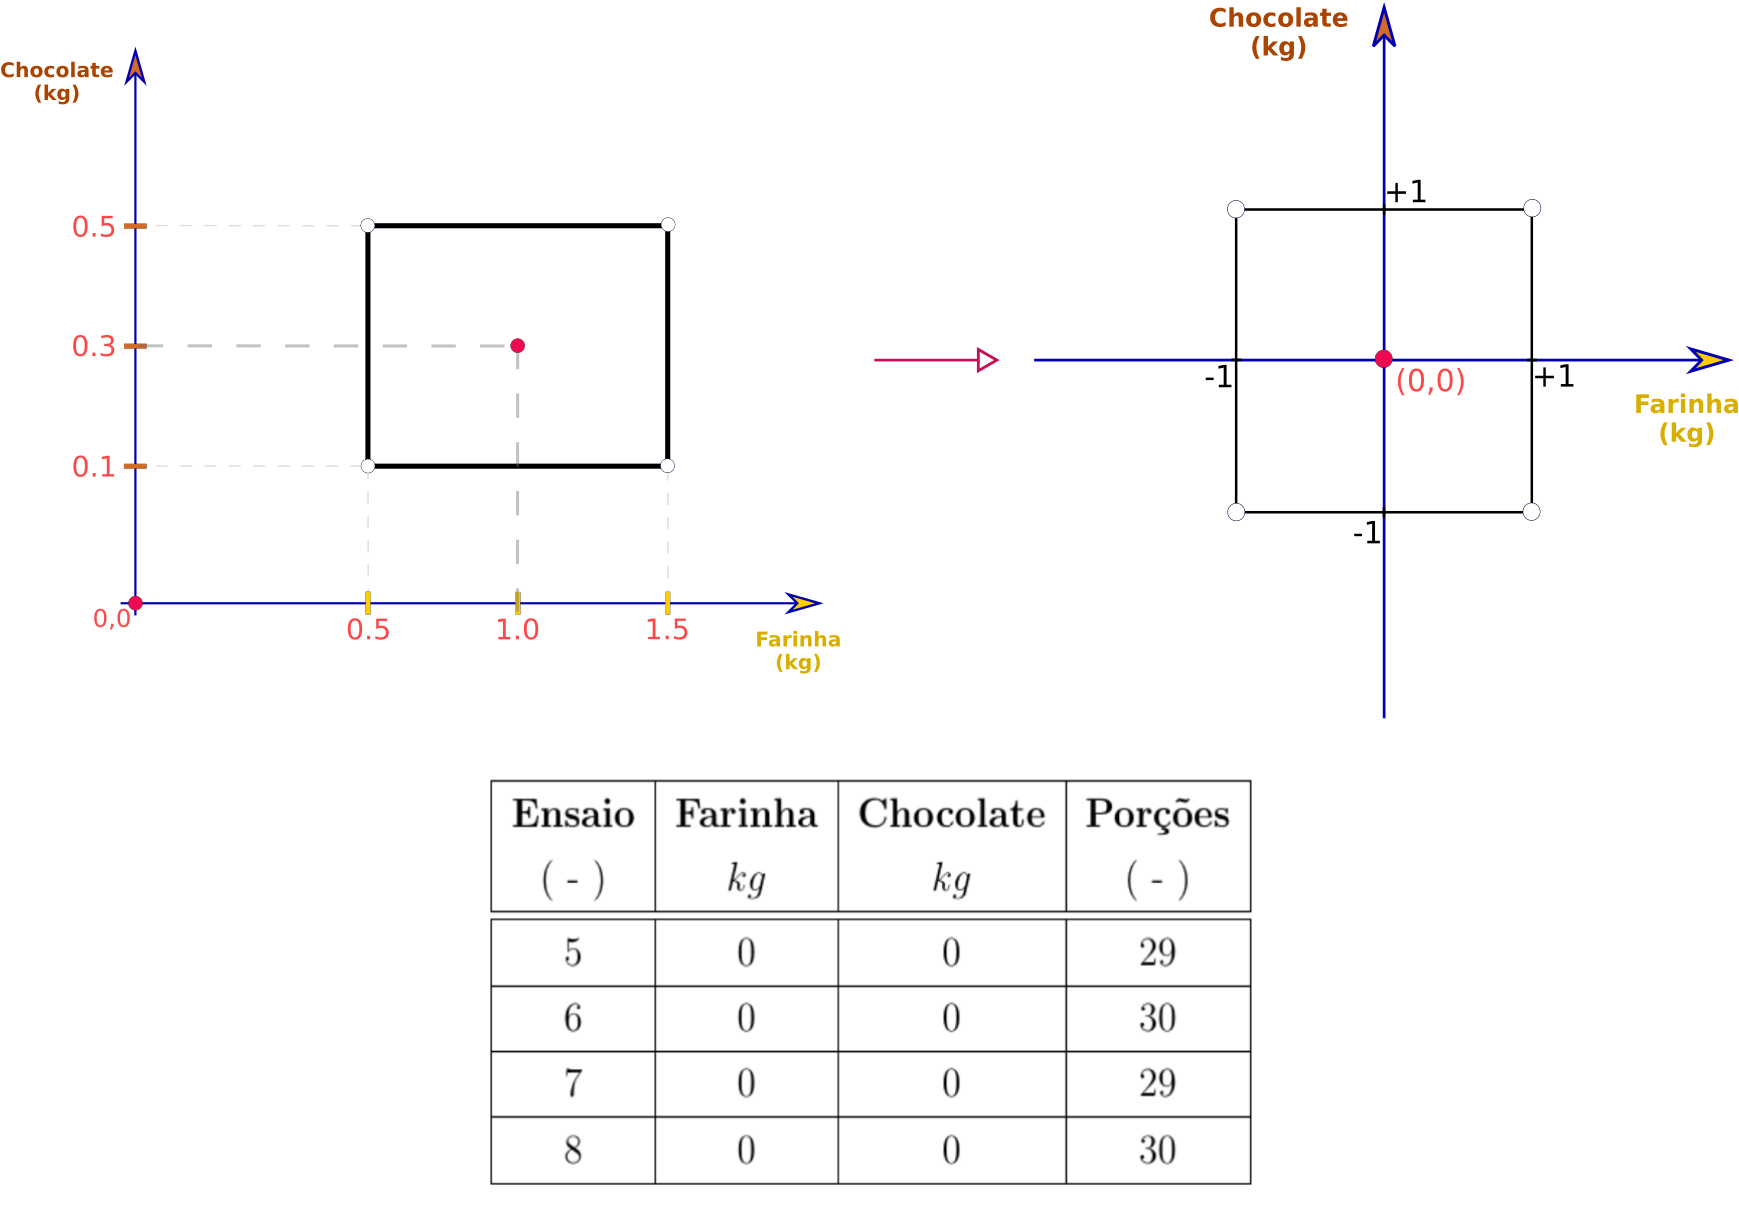


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [23]:
centro = np.array([[0,0,29],
                  [0,0,30],
                  [0,0,29],
                  [0,0,30]])

In [24]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index = [4, 5, 6, 7])

In [25]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [26]:
experimento = experimento.append(centro_dataframe)

In [27]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [28]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [29]:
modelo_ajustado = modelo.fit()

In [30]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Thu, 04 Aug 2022   Prob (F-statistic):            0.00152
Time:                        22:20:27   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<p style='margin: 200px 200px;'>    


<hr>


    
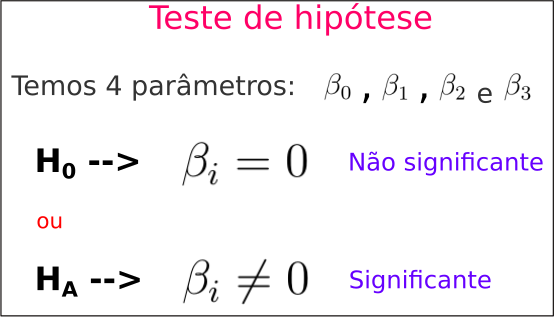

<p style='margin: 30px 30px;'>    

<hr>


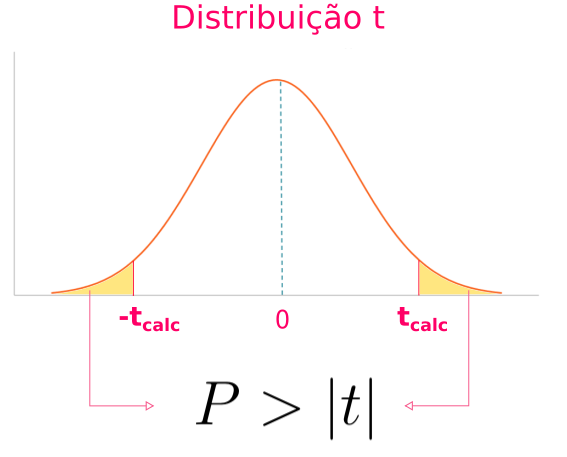


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
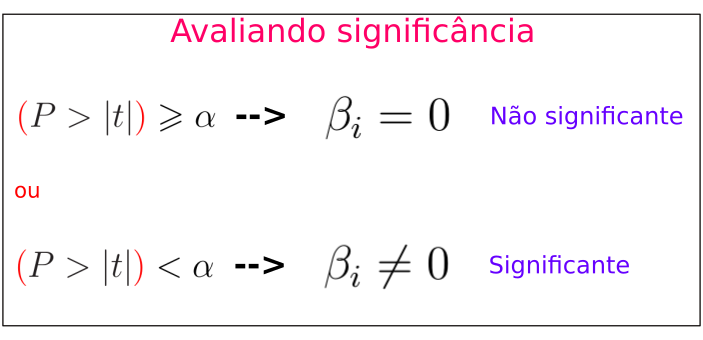


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





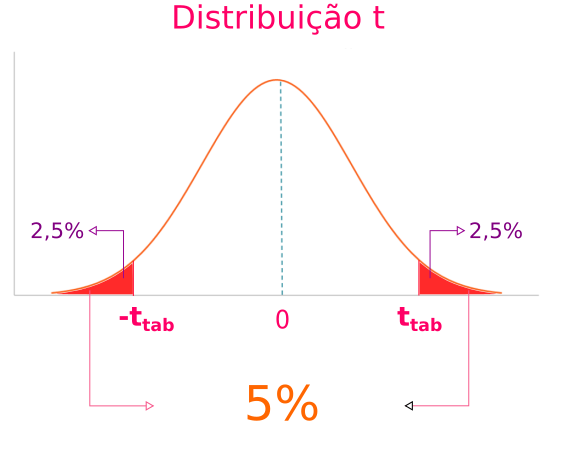

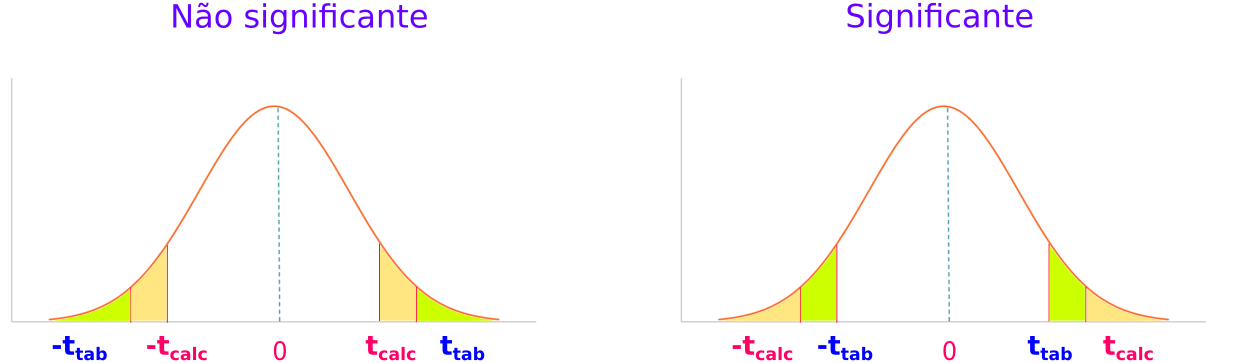

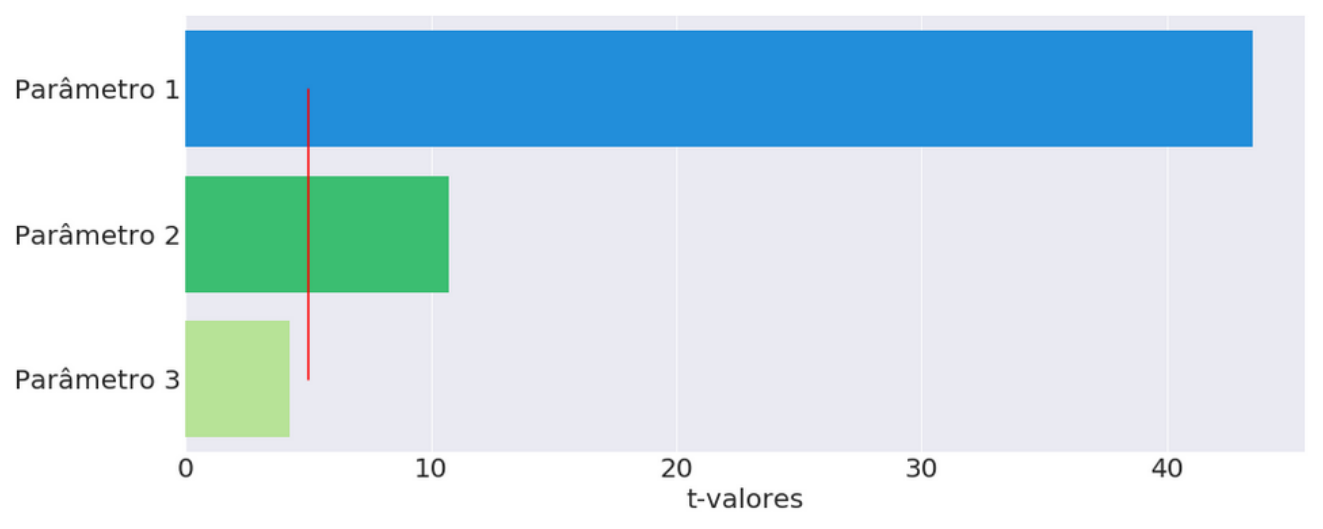

In [31]:
t_valores = modelo_ajustado.tvalues

In [32]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [33]:
nome = t_valores.index.tolist()

In [34]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [35]:
from scipy import stats

### .


In [36]:
distribuicao = stats.t(df = 4)

In [37]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [38]:
limite = [distribuicao.ppf(q = 1 - 0.025)]*len(nome)

In [39]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

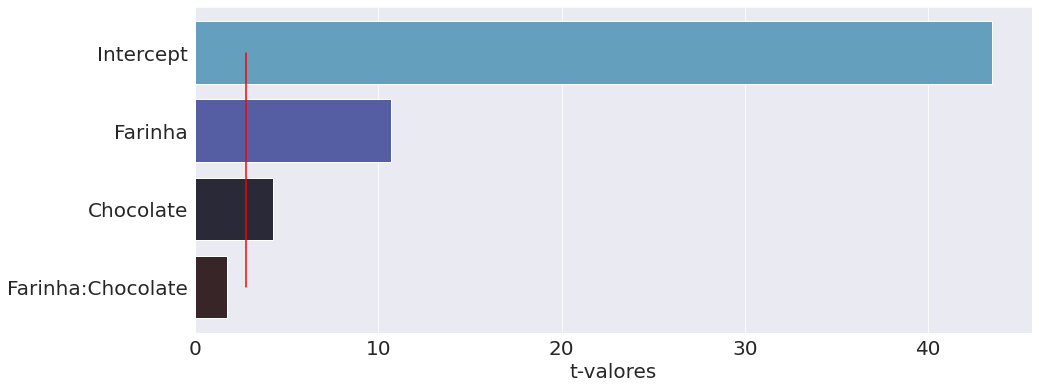

In [40]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t-valores', fontsize = 20)

pareto.plot(limite, nome, 'r')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


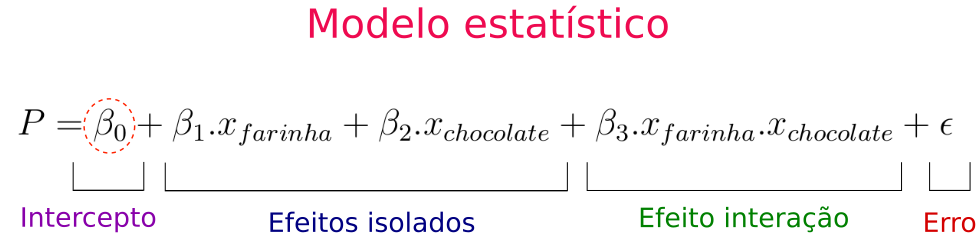

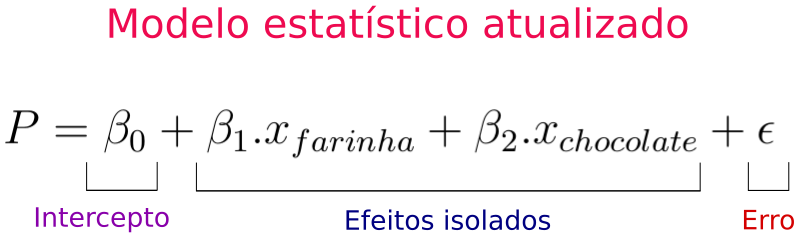

In [41]:
modelo_atualizado = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [44]:
modelo_atualizado = modelo_atualizado.fit()

In [45]:
print(modelo_atualizado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           0.000571
Time:                        22:24:21   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [51]:
t_valores = modelo_atualizado.tvalues

In [52]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [59]:
nome = t_valores.index.tolist()

In [60]:
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [62]:
distribuicao = stats.t(df = 5)

In [63]:
distribuicao.ppf(q = 1 - 0.025)

2.5705818366147395

In [64]:
limite = [distribuicao.ppf(q = 1 - 0.025)]*len(nome)

### Plotando o gráfico

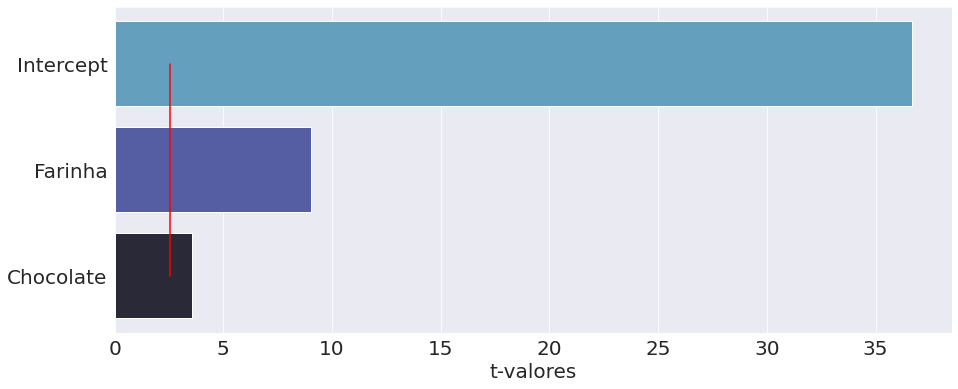

In [65]:
pareto = sns.barplot(x = t_valores, y = nome, orient = 'h')
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t-valores', fontsize = 20)

pareto.plot(limite, nome, 'r')

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [66]:
observados = experimento['Porcoes']

In [67]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [68]:
preditos = modelo_atualizado.predict()

In [69]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [70]:
import matplotlib.pyplot as plt

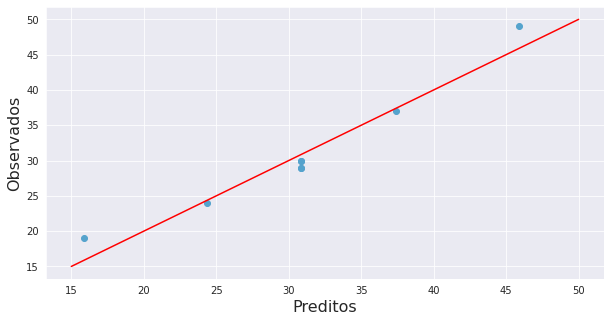

In [74]:
plt.figure(figsize = (10,5))
plt.xlabel('Preditos', size = 16)
plt.ylabel('Observados', size = 16)

# Linha de Guia
x = np.linspace(start = 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)

plt.plot(x, y, 'r') #Representa a condição onde valores preditos são iguais ao observados (Valores Ideais)

#Comparação
plt.scatter(preditos, observados)



<hr>

In [75]:
print(modelo_atualizado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           0.000571
Time:                        22:50:38   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [76]:
parametros = modelo_atualizado.params

In [77]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [80]:
def modelo_receita(x_f, x_c):
  
  #Normalizando os limites
  limite_normalizado = [-1, +1]
  limite_farinha = [0.5, 1.5]
  limite_chocolate = [0.1, 0.5]

  #Converter os valores reais em valores normalizados
  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

  porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido
  return round(porcoes)

In [82]:
kg_farinha = 0.5
kg_chocolate = 0.2
qtd_cupcakes = modelo_receita(kg_farinha, kg_chocolate)

print(f'Com {kg_farinha} kg de Farinha e {kg_chocolate} kg de Chocolate, temos um total de {qtd_cupcakes} cupcakes.')

Com 0.5 kg de Farinha e 0.2 kg de Chocolate, temos um total de 18 cupcakes.



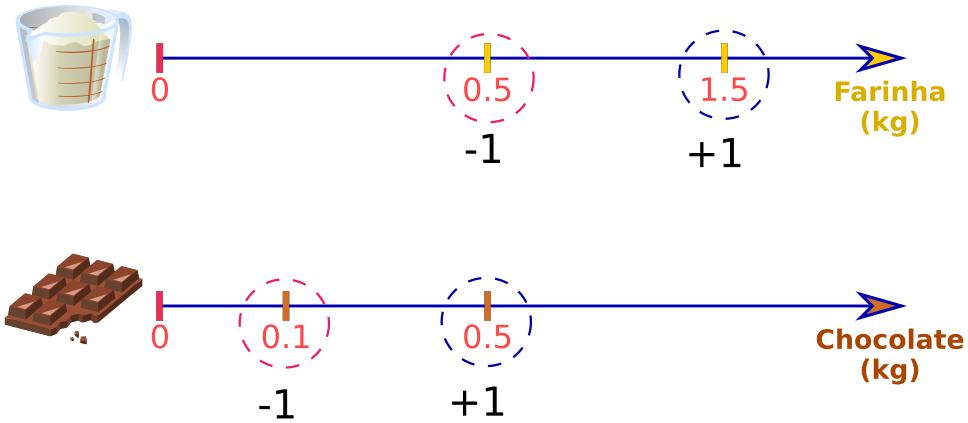

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


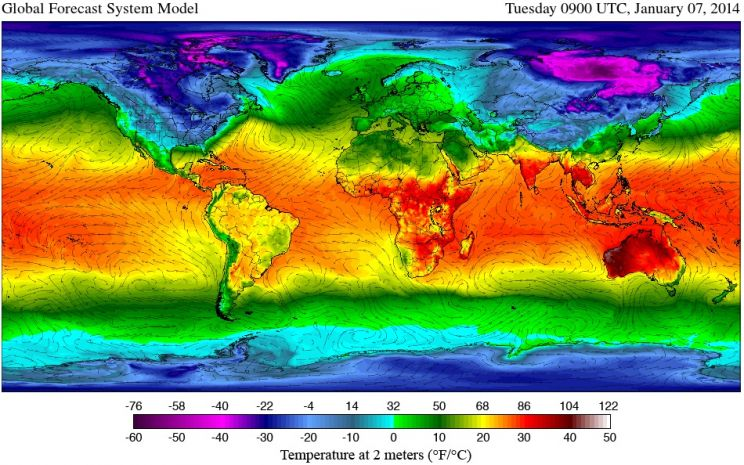


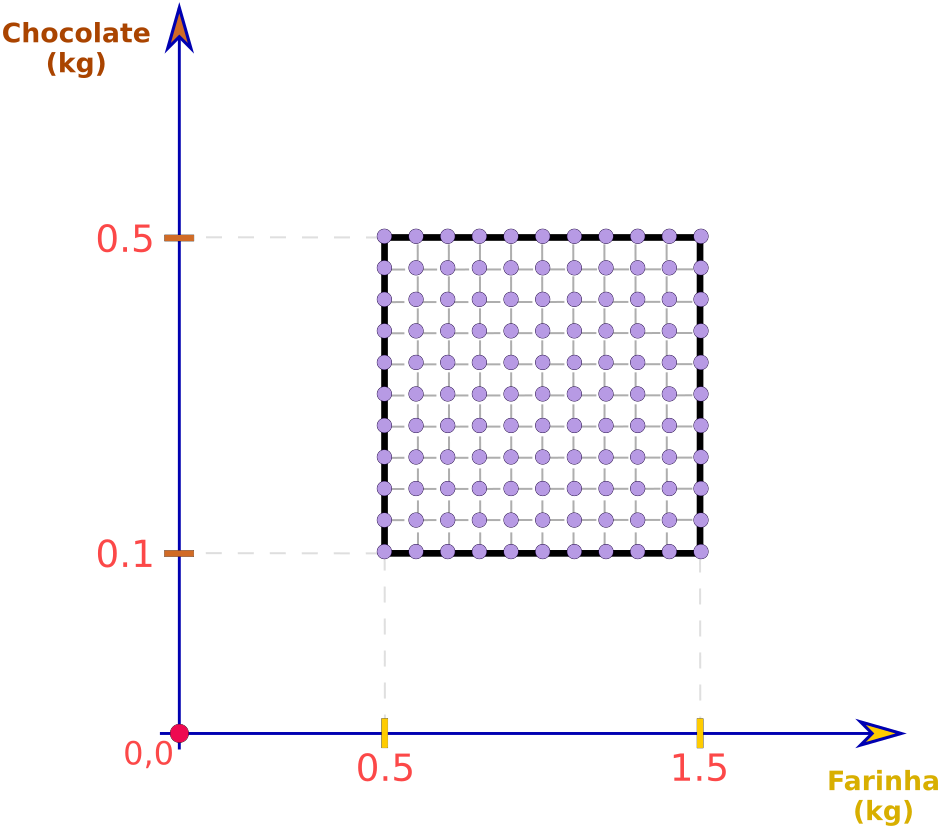

In [83]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [84]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [104]:
pontos = []
for i in x_farinha:
  temp = []
  for j in x_chocolate:
    temp.append(modelo_receita(i, j))
  
  pontos.append(temp)

In [105]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [88]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

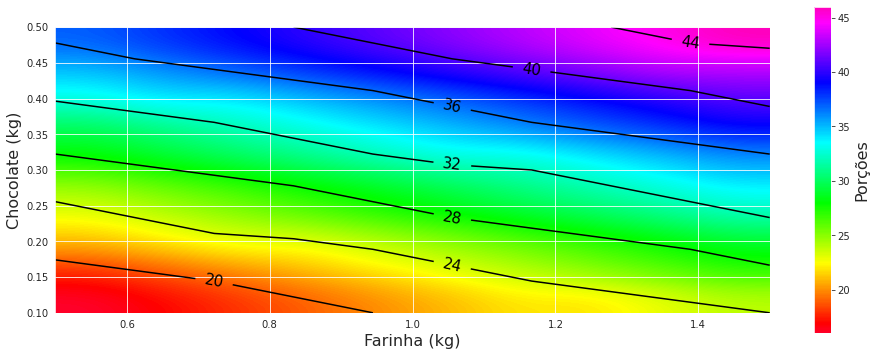

In [112]:
#Base
plt.figure(figsize = (16,6))
plt.xlabel('Farinha (kg)', fontsize = 16)
plt.ylabel('Chocolate (kg)', fontsize = 16)

#Mapa de Cores
mapa_cor = plt.imshow(pontos, 
                      cmap = cm.gist_rainbow, 
                      interpolation = 'quadric',
                      extent = (0.5,1.5,0.1,0.5),
                      origin = 'lower')

plt.colorbar().set_label('Porções', fontsize = 16)

#Linhas de Apoio
#Isolinhas representam regiões do gráfico onde a quantidade de cupcakes é igual
linhas = plt.contour(x_farinha, x_chocolate, 
                     pontos, colors = 'k',
                     linewidths = 1.5)

plt.clabel(linhas, inline = True, 
           fontsize = 15, inline_spacing = 10,
           fmt = '%1.0f')